CatBoost not installed. Install with: pip install catboost
Training models...
Training KNN Regressor...
Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Regressor...
Training Ridge Regression...
Training Lasso Regression...
Training Elastic Net...
Training Bayesian Ridge...
Training Huber Regressor...
Training Extra Trees...
Training AdaBoost...
Training MLP Regressor...
Training SGD Regressor...
Training Kernel Ridge...
Training Bagging Regressor...
Training Gaussian Process...
Training XGBoost...
Training LightGBM...
Training completed!


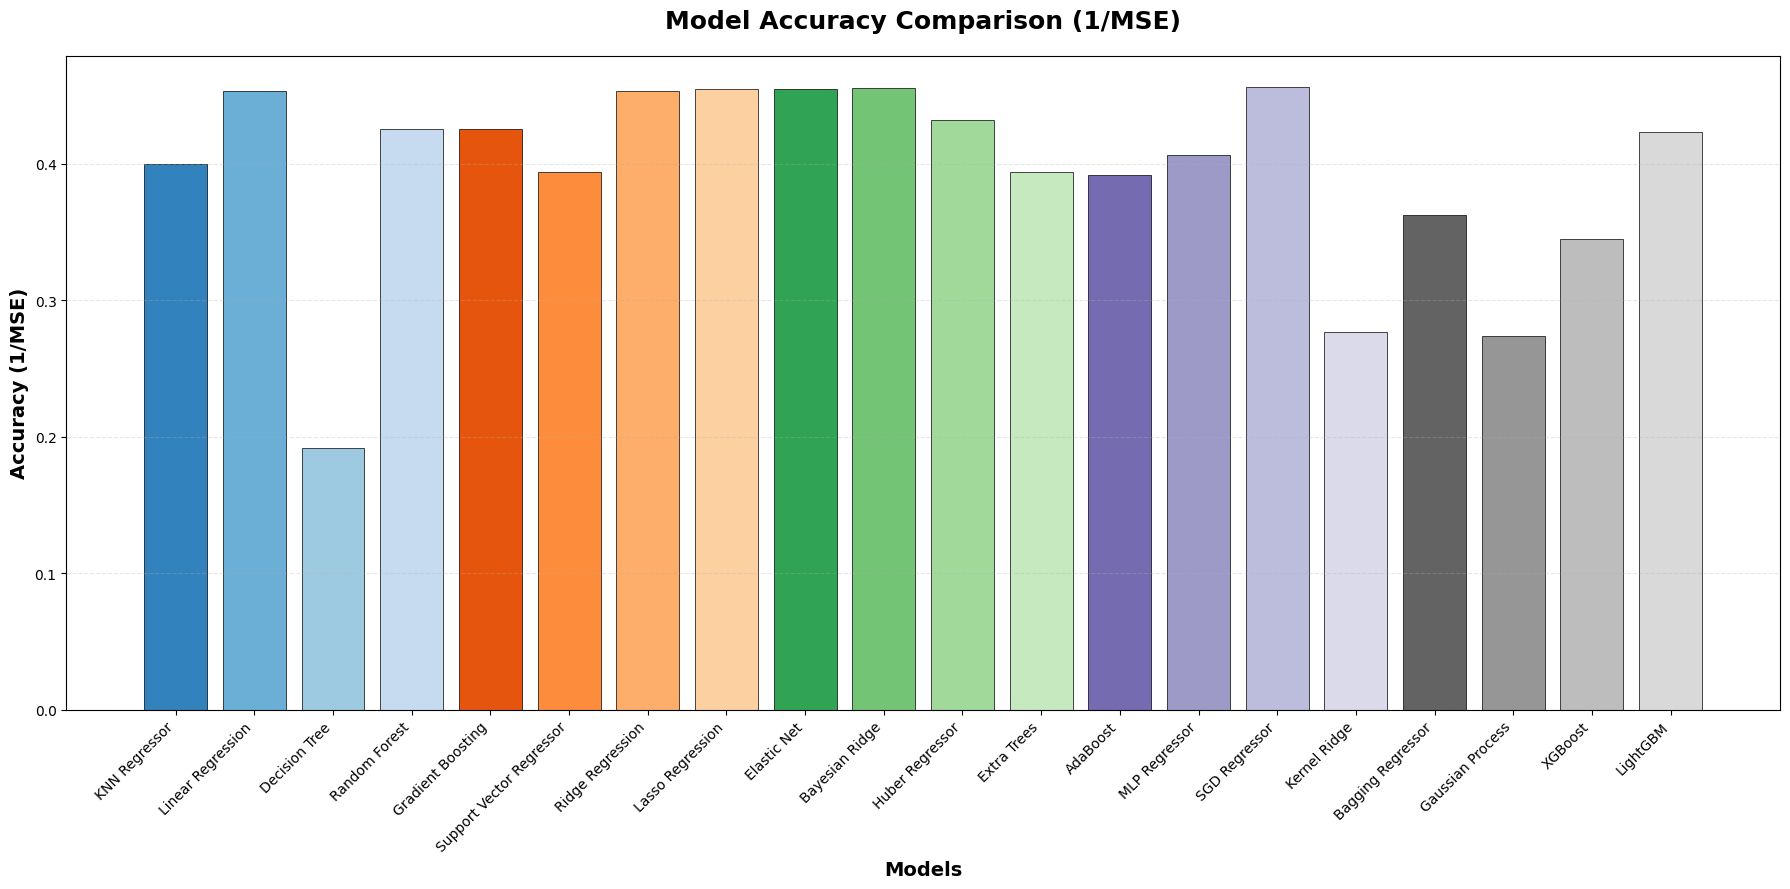


                    MODEL PERFORMANCE RESULTS
Rank  Model Name                    MSE            Accuracy (1/MSE)
----------------------------------------------------------------------
1     SGD Regressor                 2.1917         0.4563         
2     Bayesian Ridge                2.1957         0.4554         
3     Lasso Regression              2.1992         0.4547         
4     Elastic Net                   2.1992         0.4547         
5     Ridge Regression              2.2054         0.4534         
6     Linear Regression             2.2059         0.4533         
7     Huber Regressor               2.3128         0.4324         
8     Random Forest                 2.3517         0.4252         
9     Gradient Boosting             2.3520         0.4252         
10    LightGBM                      2.3612         0.4235         
11    MLP Regressor                 2.4623         0.4061         
12    KNN Regressor                 2.5001         0.4000         
13    Supp

Button(button_style='success', description='🔥 Predict Burned Area', icon='fire', style=ButtonStyle(), tooltip=…

Output()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet,
                                   BayesianRidge, HuberRegressor, SGDRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                               ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from IPython.display import display, clear_output

# For XGBoost, CatBoost, LightGBM - install if not present
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False
    print("XGBoost not installed. Install with: pip install xgboost")

try:
    from catboost import CatBoostRegressor
    catboost_available = True
except:
    catboost_available = False
    print("CatBoost not installed. Install with: pip install catboost")

try:
    from lightgbm import LGBMRegressor
    lgbm_available = True
except:
    lgbm_available = False
    print("LightGBM not installed. Install with: pip install lightgbm")


# Load and preprocess dataset
data = pd.read_csv('forestfires.csv')


# Encode categorical features
le_month = LabelEncoder()
le_day = LabelEncoder()
data['month'] = le_month.fit_transform(data['month'])
data['day'] = le_day.fit_transform(data['day'])


# Handle missing values
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)


# Log transform target to reduce skewness
data['log_area'] = np.log(data['area'] + 1)


# Features and target
X = data.drop(['area', 'log_area'], axis=1)
y = data['log_area']


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SOLUTION: Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# Define and train models (Original 6 + 12 + 4 additional = 22 total)
models = {
    # Original 6 models
    'KNN Regressor': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),

    # Additional 12 models
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000, early_stopping=True),

    # 4 More additional models
    'SGD Regressor': SGDRegressor(random_state=42, max_iter=1000, tol=1e-3),
    'Kernel Ridge': KernelRidge(alpha=1.0),
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Gaussian Process': GaussianProcessRegressor(random_state=42)
}

# Add XGBoost if available
if xgb_available:
    models['XGBoost'] = XGBRegressor(random_state=42, verbosity=0)

# Add CatBoost if available
if catboost_available:
    models['CatBoost'] = CatBoostRegressor(random_state=42, verbose=0)

# Add LightGBM if available
if lgbm_available:
    models['LightGBM'] = LGBMRegressor(random_state=42, verbose=-1)


trained_models = {}
results = {}


print("Training models...")
print("="*60)
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    preds = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, preds)
    results[name] = mse
print("="*60)
print("Training completed!")


# Plot accuracy graph
plt.figure(figsize=(18, 9))
accuracy = [1/mse for mse in results.values()]
colors = plt.cm.tab20c(np.linspace(0, 1, len(results)))
bars = plt.bar(results.keys(), accuracy, color=colors, edgecolor='black', linewidth=0.5)
plt.title('Model Accuracy Comparison (1/MSE)', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Accuracy (1/MSE)', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# Print model performance
print("\n" + "="*70)
print(" "*20 + "MODEL PERFORMANCE RESULTS")
print("="*70)
print(f"{'Rank':<6}{'Model Name':<30}{'MSE':<15}{'Accuracy (1/MSE)':<15}")
print("-"*70)
for rank, (name, mse) in enumerate(sorted(results.items(), key=lambda x: x[1]), 1):
    accuracy_score = 1/mse
    print(f"{rank:<6}{name:<30}{mse:<15.4f}{accuracy_score:<15.4f}")
print("="*70)


# Input widgets for user input
x_coord = widgets.IntSlider(min=1, max=9, value=5, description='X coord')
y_coord = widgets.IntSlider(min=2, max=9, value=5, description='Y coord')
month = widgets.Dropdown(options=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                          value='aug', description='Month')
day = widgets.Dropdown(options=['mon','tue','wed','thu','fri','sat','sun'],
                        value='fri', description='Day')
ffmc = widgets.FloatSlider(min=18.7, max=96.2, value=90.0, step=0.1, description='FFMC')
dmc = widgets.FloatSlider(min=1.1, max=291.3, value=150.0, step=0.1, description='DMC')
dc = widgets.FloatSlider(min=7.9, max=860.6, value=400.0, step=0.1, description='DC')
isi = widgets.FloatSlider(min=0.0, max=56.1, value=10.0, step=0.1, description='ISI')
temp = widgets.FloatSlider(min=2.2, max=33.3, value=20.0, step=0.1, description='Temp C')
rh = widgets.IntSlider(min=15, max=100, value=50, description='RH%')
wind = widgets.FloatSlider(min=0.4, max=9.4, value=5.0, step=0.1, description='Wind km/h')
rain = widgets.FloatSlider(min=0.0, max=6.4, value=0.0, step=0.1, description='Rain mm')


button = widgets.Button(description='🔥 Predict Burned Area', button_style='success',
                         tooltip='Click to predict', icon='fire')


output = widgets.Output()


def on_button_clicked(b):
    with output:
        clear_output()
        # Encode categorical inputs
        try:
            month_encoded = le_month.transform([month.value])[0]
        except:
            month_encoded = 0
        try:
            day_encoded = le_day.transform([day.value])[0]
        except:
            day_encoded = 0


        user_df = pd.DataFrame([[x_coord.value, y_coord.value,
                                month_encoded, day_encoded,
                                ffmc.value, dmc.value, dc.value,
                                isi.value, temp.value, rh.value,
                                wind.value, rain.value]], columns=X.columns)


        # SOLUTION: Keep as DataFrame instead of converting to array
        user_input_scaled = pd.DataFrame(
            scaler.transform(user_df),
            columns=X.columns
        )


        print("\n" + "🔥"*35)
        print(" "*15 + "BURNED AREA PREDICTIONS (HECTARES)")
        print("🔥"*35 + "\n")
        print(f"{'Model Name':<30}{'Predicted Area (hectares)':<25}")
        print("-"*55)

        for name, model in trained_models.items():
            log_pred = model.predict(user_input_scaled)[0]
            area_pred = max(0, np.exp(log_pred) - 1)
            print(f"{name:<30}{area_pred:>20.2f} hectares")

        print("\n" + "🔥"*35)


button.on_click(on_button_clicked)


# Display widgets in organized layout
print("\n" + "="*70)
print(" "*20 + "INTERACTIVE PREDICTION INTERFACE")
print("="*70)
display(widgets.HBox([widgets.VBox([x_coord, y_coord, month, day]),
                      widgets.VBox([ffmc, dmc, dc, isi]),
                      widgets.VBox([temp, rh, wind, rain])]))
display(button, output)
